In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [10]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
target_names = list(iris_dataset.target_names)
feature_names = list(iris_dataset.feature_names)

In [11]:
def get_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    return cm, accuracy, precision, recall, f1

In [12]:
# Write decision tree classifier code here
dtree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 0.9736842105263158
F1 Score: 0.9736842105263158


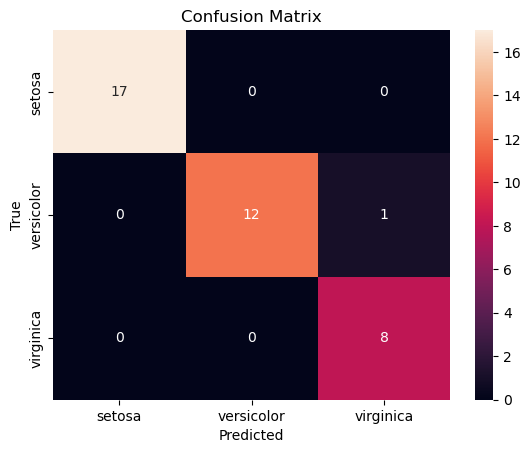

In [13]:
# test the model
predictions = dtree.predict(X_test)
# Get all the metrics
cm, accuracy, precision, recall, f1 = get_metrics(y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Plot the confusion matrix
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

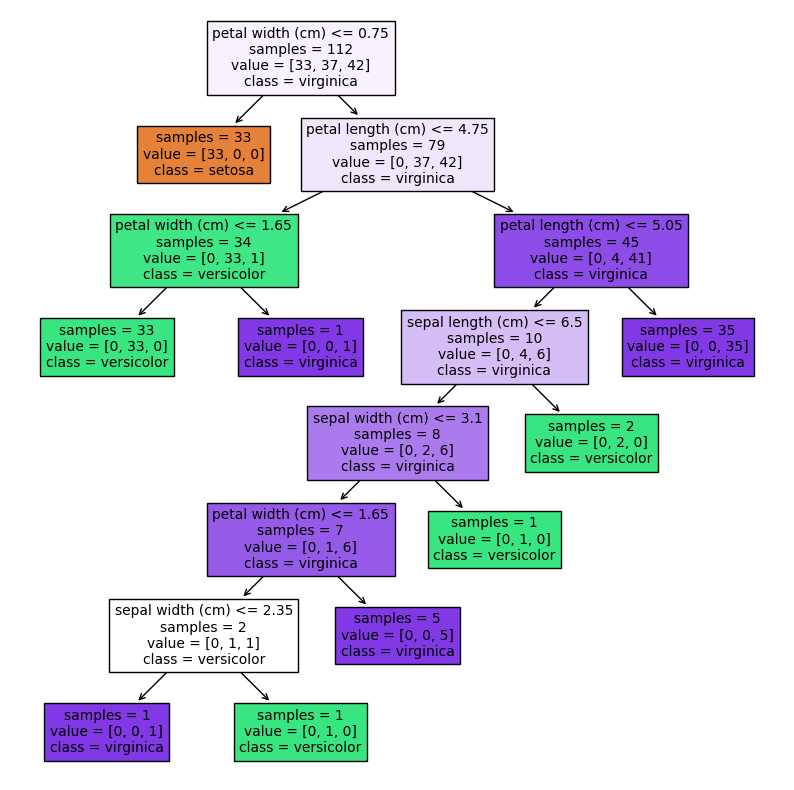

In [14]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dtree, filled=True, impurity=False, feature_names=feature_names, class_names=target_names)
plt.show()


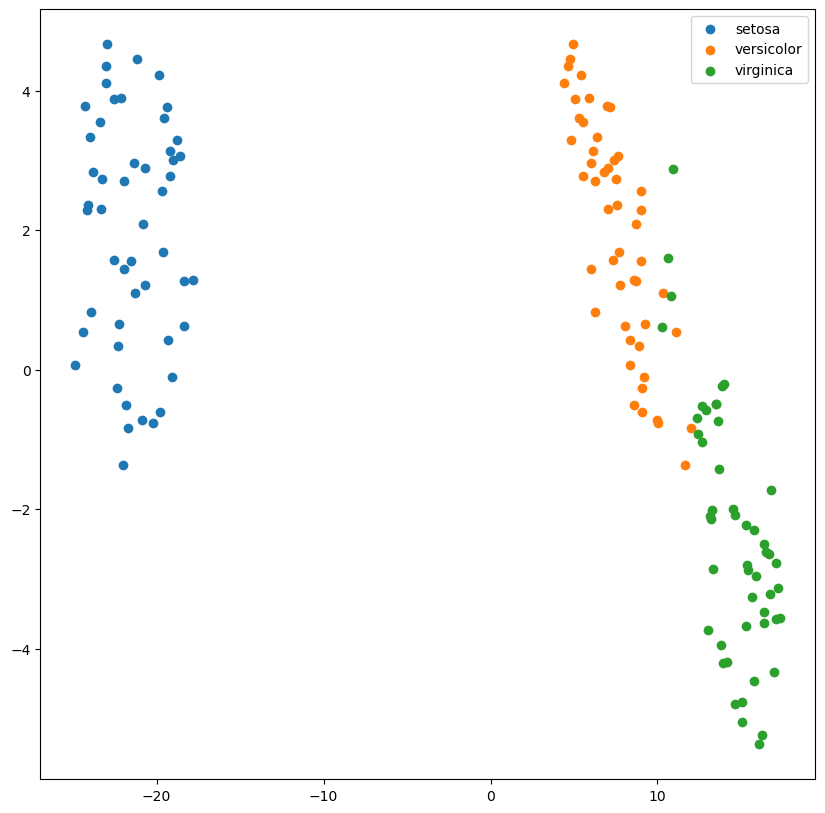

In [15]:
tsne = TSNE(n_components=2)
X_normalized = normalize(X, axis=0, norm='max')
X_embedded = tsne.fit_transform(X_normalized)
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[y == 0, 0], X_embedded[y == 1, 1], label=target_names[0])
plt.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label=target_names[1])
plt.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label=target_names[2])
plt.legend()
plt.show()

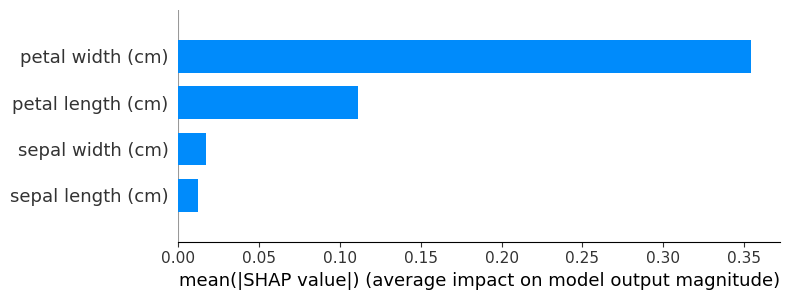

In [16]:
explainer = shap.Explainer(dtree, X_train)
shap_values = explainer.shap_values(X_test)
# Plot bar plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar", feature_names=feature_names, class_names=target_names)